In [170]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import scipy.stats as sts
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

# Практика

## Определение вероятности. События

Требуется сгенерировать необходимые выборки и произвести по ним расчеты

### Задача 1
Брошено две монеты. Найти вероятность того, что монеты выпали разными сторонами

In [69]:
bernoulli_rv = sts.bernoulli(0.5) # задаётся один параметр -- вероятность успеха

# задаем число экспериментов
n = 100000

# формируем выборку
df = pd.DataFrame({ 'result' : list( map(lambda x: bernoulli_rv.rvs(1)[0] == bernoulli_rv.rvs(1)[0], range(n)) ) })

# считаем вероятность того, что монеты выпали разными сторонами
probability = df.sum()/df.shape[0]
print(f'вероятность того, что монеты выпали разными сторонами {probability}.')

вероятность того, что монеты выпали разными сторонами result    0.49973
dtype: float64.


### Задача 2
Брошено три монеты. Описать множество всех элементарных событий. Найти вероятности следующих событий:


1.   A = {не выпало ни одного герба}
2.   B = {выпало четное число гербов}
3.   C = {на третьей монете выпал герб}


<b>Множество всех элементарных событий:</b>
1. герб, герб, герб
2. герб, герб, решка
3. герб, решка, решка
4. герб, решка, герб
5. решка, герб, герб
6. решка, герб, решка
7. решка, решка, решка
8. решка, решка, герб

In [72]:
# задаем число экспериментов
n = 100000

# Будем считать 1 - герб, 0 - решка

# формируем выборку
df = pd.DataFrame({ 'coin1' : list( map(lambda x: bernoulli_rv.rvs(1)[0], range(n)) ), 
                    'coin2' : list( map(lambda x: bernoulli_rv.rvs(1)[0], range(n)) ),
                    'coin3' : list( map(lambda x: bernoulli_rv.rvs(1)[0], range(n)) )                  
                  })

df.head()

,coin1,coin2,coin3
0,1,1,0
1,1,0,0
2,0,1,1
3,0,0,0
4,1,0,0


In [80]:
# Вероятноть того, что не выпало ни одного герба
res = df.apply(lambda x: sum(x) == 0, axis=1).sum() / df.shape[0]
print(f'Вероятноть того, что не выпало ни одного герба {res}')

Вероятноть того, что не выпало ни одного герба 0.12541


In [81]:
# Вероятноть того, что выпало четное число гербов
res = df.apply(lambda x: sum(x) == 2, axis=1).sum() / df.shape[0]
print(f'Вероятноть того, что выпало четное число гербов {res}')

Вероятноть того, что не выпало ни одного герба 0.37364


In [82]:
# Вероятноть того, что на третьей монете выпал герб
res = df.coin3.apply(lambda x: x == 1).sum() / df.shape[0]
print(f'Вероятноть того, что на третьей монете выпал герб {res}')

Вероятноть того, что не выпало ни одного герба 0.4961


Предлагается также решить задачи: 

### Задача 3
Из двух претендентов E и L на ответственную должность три члена комиссии должны отобрать одного. Каждый член комиссии должен указать либо одного достойного, либо забраковать обоих. Претендент считается выбранным, если он был признана достойным хотя бы двумя членами комиссии.
Найти вероятность событий:

A = {рекомендован L}, B = {рекомендован E}


In [99]:
# задаем число экспериментов
n = 100000

# Будем считать 0 - забракованы оба претендента
#               1 - рекомендован претендент E
#               2 - рекомендован претендент L

# формируем выборку
df = pd.DataFrame({ 'member1' : np.random.randint(0, 3, n), 
                    'member2' : np.random.randint(0, 3, n),
                    'member3' : np.random.randint(0, 3, n)                  
                  })

df.head()

,member1,member2,member3
0,2,1,0
1,0,0,2
2,1,1,0
3,1,0,1
4,2,0,1


In [100]:
# Разделим на два датафрейма для каждого претендента

df_E = df.replace({ 'member1' : {2:0}, 'member2' : {2:0}, 'member3' : {2:0}})
df_L = df.replace({ 'member1' : {1:0}, 'member2' : {1:0}, 'member3' : {1:0}})
df_L = df_L.replace({ 'member1' : {2:1}, 'member2' : {2:1}, 'member3' : {2:1}})

In [101]:
# Вероятноть того, что рекомендован L
res = df_L.apply(lambda x: sum(x)>1, axis=1).sum() / df_L.shape[0]
print(f'Вероятноть того, что рекомендован L {res}')

Вероятноть того, что рекомендован L 0.25926


In [102]:
# Вероятноть того, что рекомендован E
res = df_E.apply(lambda x: sum(x)>1, axis=1).sum() / df_E.shape[0]
print(f'Вероятноть того, что рекомендован E {res}')

Вероятноть того, что рекомендован E 0.25984


### Задача 4
Брошено две игральных кости. Описать множество элементарных событий. Найти вероятности событий:

A = {вышло две "шестерки"}

B = {сумма выпавших очков не меньше 11}

C = {не выпала ни одна "шестерка"}

<b>Множество всех элементарных событий:</b>

1. 1, 1
2. 1, 2
3. 1, 3
4. 1, 4
5. 1, 5
6. 1, 6
7. 2, 1
8. 2, 2
9. 2, 3
10. 2, 4
11. 2, 5
12. 2, 6
13. 3, 1
14. 3, 2
15. 3, 3
16. 3, 4
17. 3, 5
18. 3, 6
19. 4, 1
20. 4, 2
21. 4, 3
22. 4, 4
23. 4, 5
24. 4, 6
25. 5, 1
26. 5, 2
27. 5, 3
28. 5, 4
29. 5, 5
30. 5, 6
31. 6, 1
32. 6, 2
33. 6, 3
34. 6, 4
35. 6, 5
36. 6, 6

In [151]:
# задаем число экспериментов
n = 100000

# формируем выборку из равномерного закона распределения, значение равно выпавшим очкам
df = pd.DataFrame({ 'cube1' : np.random.randint(1, 7, n), 
                    'cube2' : np.random.randint(1, 7, n)
                  })

df.head()

,cube1,cube2
0,6,5
1,6,6
2,5,4
3,5,5
4,4,4


In [152]:
# Вероятноть того, что вышло две "шестерки"
res = df.apply(lambda x: (x.cube1==6) & (x.cube2==6), axis=1).sum() / df.shape[0]
print(f'Вероятноть того, что вышло две "шестерки" {res}')

Вероятноть того, что вышло две "шестерки" 0.0273


In [153]:
# Вероятноть того, что сумма выпавших очков не меньше 11
res = df.apply(lambda x: x.cube1 + x.cube2 >= 11, axis=1).sum() / df.shape[0]
print(f'Вероятноть того, что сумма выпавших очков не меньше 11 {res}')

Вероятноть того, что сумма выпавших очков не меньше 11 0.0834


In [154]:
# Вероятноть того, что не выпала ни одна "шестерка"
res = df.apply(lambda x: (x.cube1!=6) & (x.cube2!=6), axis=1).sum() / df.shape[0]
print(f'Вероятноть того, что не выпала ни одна "шестерка" {res}')

Вероятноть того, что не выпала ни одна "шестерка" 0.69508


## Вероятность суммы событий

### Задача 5
Брошены две игральные кости. Найти вероятность события D = {выпала хотя бы одна шестёрка}


In [155]:
# Вероятноть того, что выпала хотя бы одна шестёрка
res = df.apply(lambda x: x.cube1==6 | x.cube2==6, axis=1).sum() / df.shape[0]
print(f'Вероятноть того, что выпала хотя бы одна шестёрка {res}')

Вероятноть того, что выпала хотя бы одна шестёрка 0.08264


Предлагается также решить задачи: 

### Задача 6
В телефонном номере три последние цифры стерлись. Считая, что все возможные значения стершихся цифр равновероятны, найти вероятность событий:

A = {Стерлись различные цифры},

B = {Стерлись одинаковые цифры},

C = {Среди стершихся цифр хотя бы две совпадают},

D = {Среди стершихся цифр хотя бы две различны}


In [165]:
# задаем число экспериментов
n = 100000

# формируем выборку из равномерного закона распределения, значение равно стершейся цифре
df = pd.DataFrame({ 'number1' : np.random.randint(0, 10, n), 
                    'number2' : np.random.randint(0, 10, n),
                    'number3' : np.random.randint(0, 10, n)
                  })

df.head()

,number1,number2,number3
0,5,3,0
1,5,8,4
2,3,8,2
3,9,4,7
4,7,1,8


In [166]:
# Вероятноть того, что стерлись различные цифры
res = df.apply(lambda x: (x.number1!=x.number2) & (x.number2!=x.number3) & (x.number1!=x.number3), axis=1).sum() / df.shape[0]
print(f'Вероятноть того, что стерлись различные цифры {res}')

Вероятноть того, что стерлись различные цифры 0.72032


In [167]:
# Вероятноть того, что стерлись одинаковые цифры
res = df.apply(lambda x: (x.number1==x.number2) & (x.number2==x.number3), axis=1).sum() / df.shape[0]
print(f'Вероятноть того, что стерлись одинаковые цифры {res}')

Вероятноть того, что стерлись одинаковые цифры 0.00917


In [168]:
# Вероятноть того, что среди стершихся цифр хотя бы две совпадают
res = df.apply(lambda x: (x.number1==x.number2) | (x.number2==x.number3) | (x.number1==x.number3), axis=1).sum() / df.shape[0]
print(f'Вероятноть того, что среди стершихся цифр хотя бы две совпадают {res}')

Вероятноть того, что среди стершихся цифр хотя бы две совпадают 0.27968


In [169]:
# Вероятноть того, что среди стершихся цифр хотя бы две различны
res = df.apply(lambda x: (x.number1!=x.number2) | (x.number2!=x.number3) | (x.number1!=x.number3), axis=1).sum() / df.shape[0]
print(f'Вероятноть того, что среди стершихся цифр хотя бы две различны {res}')

Вероятноть того, что среди стершихся цифр хотя бы две различны 0.99083


## Случайные величины

### Задача 7
В лотерее имеется 10 билетов, из которых один выигрышный. Размер выигрыша 10 ден. ед.; стоимость билета 1 ден ед. Найти закон распределения случайной величины X, равной чистому выигрышу участника лотереи, который вытаскивает билет первым.

In [212]:
# задаем число экспериментов
n = 100000
# Всего билетов. Будем считать, что выигрышный первый билет
tickets = 10

# формируем выборку, сразу считаем сумму, которую либо выиграл, либо проиграл участник
df = pd.DataFrame( {'res' : map(lambda x: 9 if x==1 else -1, np.random.randint(1, tickets+1, n)) } )

df.head()

,res
0,-1
1,-1
2,-1
3,9
4,-1


<AxesSubplot:ylabel='Frequency'>

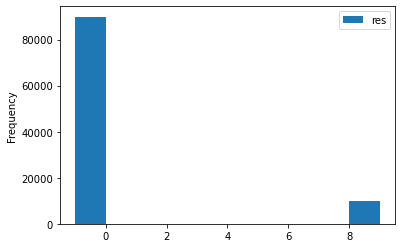

In [213]:
df.plot(kind='hist')

Предлагается также решить задачу: 

### Задача 8
Брошены две игральные кости. Найти закон распределения случайной величины $X$, равной сумме выпавших очков. Найти вероятности событий ${X <= 4}$, ${X > 4}$

In [233]:
# задаем число экспериментов
n = 100000

# формируем выборку из равномерного закона распределения, значение равно выпавшим очкам
df = pd.DataFrame({ 'cube1' : np.random.randint(1, 7, n), 
                    'cube2' : np.random.randint(1, 7, n)
                  })

df['res'] = df.sum(axis=1)

df.head()

,cube1,cube2,res
0,1,5,6
1,3,6,9
2,1,6,7
3,1,6,7
4,5,4,9


In [234]:
# Вероятноть того, что 𝑋<=4
res = df[df['res'] <= 4].shape[0] / df.shape[0]
print(f'Вероятноть того, что 𝑋<=4 {res}')

Вероятноть того, что 𝑋<=4 0.16728


In [235]:
# Вероятноть того, что 𝑋>4
res = df[df['res'] < 4].shape[0] / df.shape[0]
print(f'Вероятноть того, что 𝑋>4 {res}')

Вероятноть того, что 𝑋>4 0.08406


## Условные вероятности

### Задача 9
Из колоды (36 карт) вынимают последовательно без возвращения две карты. Найти вероятность того, что первой картой была шестерка, а второй — семерка. Найти условную вероятность того же события при условии, что обе карты бубновой масти.


Предлагается также решить задачу: 

### Задача 10
Из урны, содержащей два белых и три черных шара, последовательно извлекают два шара; вынутые шары не возвращаются. Если первый шар оказался черным, то перед вторым извлечением в урну добавляют белый шар. В противном случае состав оставшихся шаров не меняют. Найти вероятности событий:

$A$ = {извлечены два белых шара},

$B$ = {извлечены два черных шара}

Указание. Пусть событие $C_1$ = {первый шар белый}, событие $C_2$ = {второй шар белый}. Тогда $A = C_1C_2$, $B = \overline C_1 \overline C_2$ 